## 1. Data Preprocessing

First we need to find the factors on which our target variable (i.e Charges) depend.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Medical_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(2772, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
# Checking if any null value present
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Getting an overview regarding the data set.

data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


# Feature Selection

## 2. Checking Co-relation between all independent variables on the dependend variable (charges)

### A) Finding corelation between Age and Charges.

#### i) Using graphical method (by the help of scatter plot using regression line).

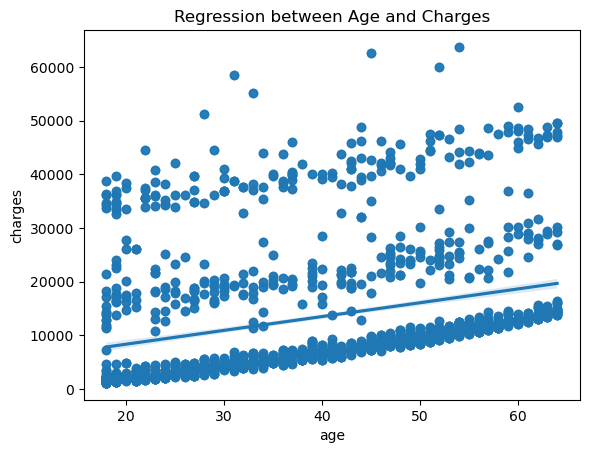

In [8]:
plt.title('Regression between Age and Charges')
sns.regplot(x=data['age'],y=data['charges'])
plt.show()

Observing the data, it becomes apparent that there is a slight upward trend in charges as age increases. To enhance clarity, we can represent this relationship using a regression line, which exhibits a positive correlation. Consequently, we can conclude that age plays a modest role in predicting insurance prices.

#### ii) Using statistical method (by using Pearson's corelation method).

In [9]:
from scipy.stats import pearsonr

In [10]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data['age'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.29862366562936293
P-value: 3.316072999833237e-58


The Pearson Correlation Coefficient indicates that the linear realion between age and charges is not extremly strong but positively corelated, while the P-value is far less than 0.001 which indicates that the relation is statistically significant.

### B) Finding corelation between Sex and Charges.

#### i) Using graphical method (by the help of scatter plot using regression line).

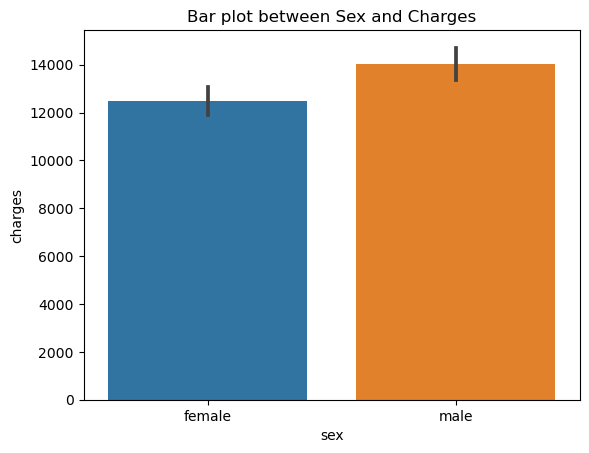

In [11]:
plt.title('Bar plot between Sex and Charges')
sns.barplot(x=data['sex'],y=data['charges'])
plt.show()

The graph shows there is no relation between the sex of individual and charges, as both male and female has almost same figure.Hence, sex of the person does not necessarily determine the insurance charges one pays.

### C) Finding corelation between BMI and Charges.

#### i) Using graphical method (by the help of scatter plot using regression line).

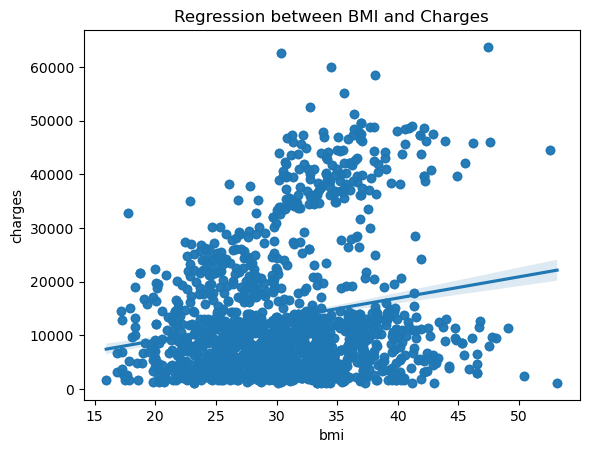

In [12]:
plt.title('Regression between BMI and Charges')
sns.regplot(x=data['bmi'],y=data['charges'])
plt.show()

#### ii) Using statistical method (by using Pearson's corelation method).

In [13]:
correlation_coefficient, p_value = pearsonr(data['bmi'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.19984604873978873
P-value: 2.2935230918641643e-26


Observing the data, it becomes apparent that there is a positive correlation trend in charges as BMI increases. To enhance clarity, we can represent this relationship using a regression line. 

The Pearson Correlation Coefficient indicates that the linear realion between BMI and charges is not very strong but positively corelated, while the P-value is less than 0.001 which indicates that the relation is statistically significant.

### D) Finding corelation between Children and Charges.

#### i) Using graphical method (by the help of bar plot).

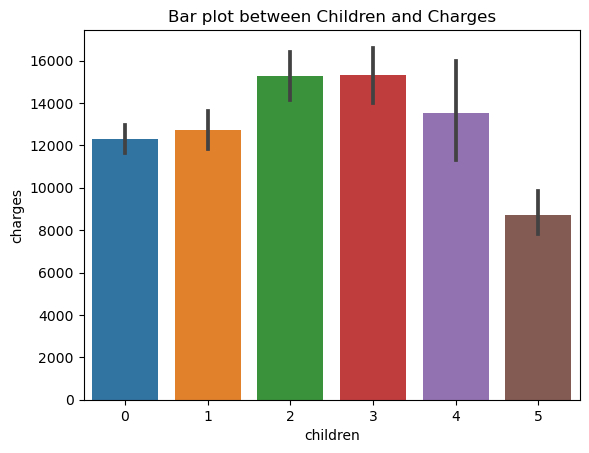

In [14]:
plt.title('Bar plot between Children and Charges')
sns.barplot(x=data['children'],y=data['charges'])
plt.show()

People with 2 or 3 kids usually pay more for insurance, which is kind of expected. But surprisingly, those with 5 kids pay the least. So, for sure, the number of children is a factor that predicts how much someone pays for insurance.

#### ii) Using statistical method (by using Pearson's corelation method).

In [15]:
correlation_coefficient, p_value = pearsonr(data['children'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.06644231780125451
P-value: 0.00046444822980333197


The Pearson Correlation Coefficient indicates that the linear realion between Children and charges is not very strong but positively corelated, while the P-value is less than 0.05  but closet among all other variables which indicates that the relation is statistically very significant.

### E) Finding corelation between Smoker and Charges.

#### i) Using graphical method (by the help of bar plot).

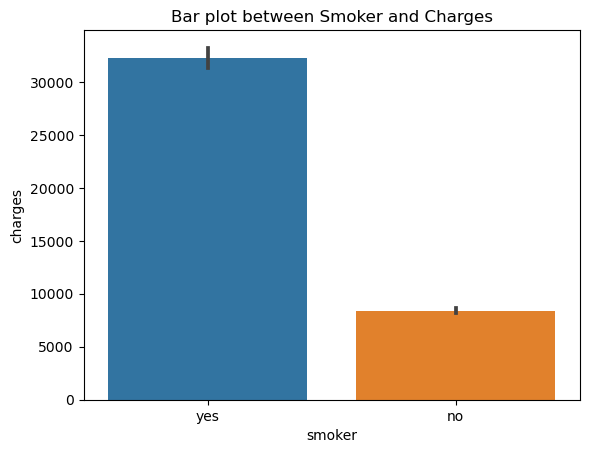

In [16]:
plt.title('Bar plot between Smoker and Charges')
sns.barplot(x=data['smoker'],y=data['charges'])
plt.show()

Basically, people who don't smoke usually pay less for insurance, while smokers end up with higher bills. So, whether you smoke or not affects how much you pay for insurance.

### F) Finding corelation between  Region and Charges.

#### i) Using graphical method (by the help of bar plot).

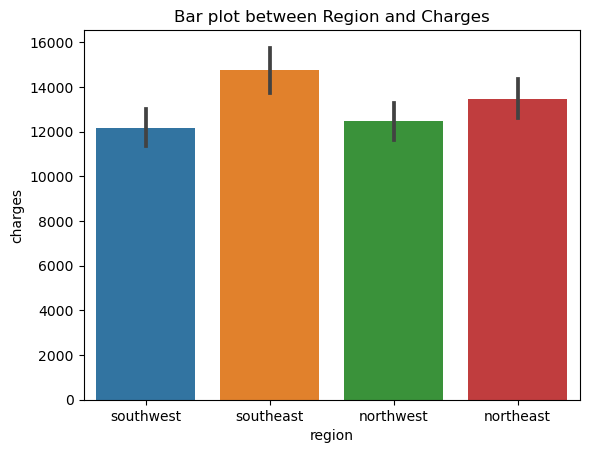

In [17]:
plt.title('Bar plot between Region and Charges')
sns.barplot(x=data['region'],y=data['charges'])
plt.show()

From the graph we can distinctly reveals that the region of the person is significant. This is evident because, on average, individuals from the southeast and northeast tend to have higher payments.

## 3. Converting the categorical data of column sex, smoker and region into numerical data.

In [18]:
# For this we will use Label encoder method.

from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for 'sex', 'region', and 'smoker' columns
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['region'] = label_encoder.fit_transform(data['region'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Display the updated DataFrame
print(data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200

[2772 rows x 7 columns]


In [19]:
# Now we can find the statistical corelation for categorical data which is now converted into numerical data.

correlation_coefficient, p_value = pearsonr(data['sex'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.06283682831973222
P-value: 0.0009325439388300717


The Pearson Correlation Coefficient indicates that the linear realion between sex and charges is not very strong but positively corelated, while the P-value is less than 0.05 which indicates that the relation is statistically significant.

In [20]:
correlation_coefficient, p_value = pearsonr(data['smoker'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.788783349141915
P-value: 0.0


The Pearson Correlation Coefficient indicates that the linear realion between smoker and charges is very strong also positively corelated, while the P-value of 0 suggests extremely strong evidence against the null hypothesis.

In [21]:
correlation_coefficient, p_value = pearsonr(data['region'], data['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.013529869264935173
P-value: 0.4764300836019835


A Pearson correlation coefficient of -0.0135 indicates a very weak negative linear relationship, and a p-value of 0.4764 suggests that this correlation is not statistically significant at the conventional significance level of 0.05. In such cases, it's generally not advisable to include the variable in  model as an independent variable, as the weak correlation and lack of statistical significance suggest that changes in this variable are not strongly associated with changes in the dependent variable.

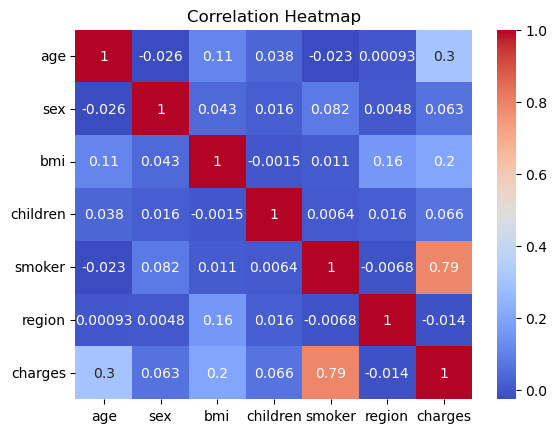

In [22]:
# Finding the correlation of depndent variable on all independent variables by using heat-map.

# Create a heatmap of the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

##### From the above corelation method we can see that variables on which dependent variable charge depends are:-  age, BMI, smoker, children and sex.

## 4. Store Feature matrix in X and Response (Target variable) in vector y

In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
X = data[['age','bmi', 'children', 'smoker', 'sex']]
X.head()

,age,bmi,children,smoker,sex
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1


In [25]:
y = data['charges']
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


## 5. Train/Test split.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardizing the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Model Training

In [28]:
# Importing the models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
# Traning the models

lr = LinearRegression()
lr.fit(X_train,y_train)
br = BayesianRidge()
br.fit(X_train,y_train)
svm = SVR()
svr_model = SVR(kernel='linear') 
svr_model.fit(X_train,y_train)
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

## 7. Prediction

In [30]:
# Prediction on test data

y_pred1 = lr.predict(X_test)
y_pred2 = br.predict(X_test)
y_pred3 = svr_model.predict(X_test)
y_pred4 = dtr.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gr.predict(X_test)

# Comparing the values of model with actual value.

df1 = pd.DataFrame({'Actual': y_test, 'lr': y_pred1, 'br': y_pred2,'svr_model':y_pred3, 'dtr': y_pred4, 'rf': y_pred5, 'gr': y_pred6})

In [31]:
df1

,Actual,lr,br,svr_model,dtr,rf,gr
1106,8988.15875,10146.743257,10150.171640,9647.687989,8988.15875,9228.129393,9975.150286
1321,28101.33305,36266.053814,36249.590460,13490.506742,28101.33305,28383.498013,27838.587718
2313,12032.32600,9623.648288,9626.883920,12150.835690,12032.32600,13125.209661,12341.929313
2274,1682.59700,6124.165063,6129.586083,2260.873781,1682.59700,2248.870702,2435.649784
1432,3393.35635,5811.326563,5815.593220,1909.019775,3393.35635,4139.496691,6041.325628
...,...,...,...,...,...,...,...
930,2927.06470,9761.273516,9766.661922,3576.177083,2927.06470,2927.560552,2797.546990
2610,6858.47960,6650.562996,6655.508376,7740.387082,6858.47960,6600.336420,6612.945506
1700,34838.87300,28824.363891,28807.432399,4230.371899,34838.87300,34823.890274,35298.116019
100,6186.12700,8615.949515,8619.573957,7500.891941,6185.32080,6243.123430,7052.450680


## 8. Comparing Prediction of the model visually to find the best model among them.

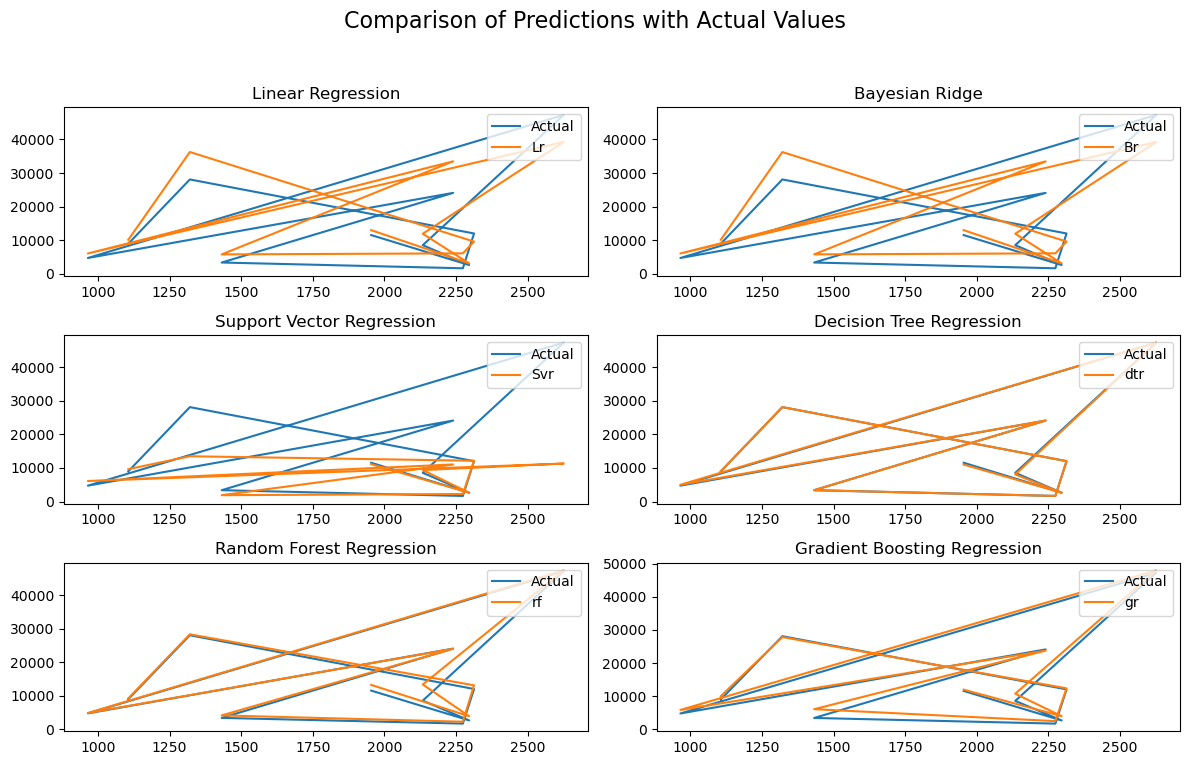

In [32]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.suptitle('Comparison of Predictions with Actual Values', fontsize=16)

# Plot 1
axes[0, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[0, 0].plot(df1['lr'].iloc[0:11], label='Lr')
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_title('Linear Regression')

# Plot 2
axes[0, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[0, 1].plot(df1['br'].iloc[0:11], label='Br')
axes[0, 1].legend(loc='upper right')
axes[0, 1].set_title('Bayesian Ridge')

# Plot 3
axes[1, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[1, 0].plot(df1['svr_model'].iloc[0:11], label='Svr')
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_title('Support Vector Regression')

# Plot 4
axes[1, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[1, 1].plot(df1['dtr'].iloc[0:11], label='dtr')
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_title('Decision Tree Regression')

# Plot 5
axes[2, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[2, 0].plot(df1['rf'].iloc[0:11], label='rf')
axes[2, 0].legend(loc='upper right')
axes[2, 0].set_title('Random Forest Regression')

# Plot 6
axes[2, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[2, 1].plot(df1['gr'].iloc[0:11], label='gr')
axes[2, 1].legend(loc='upper right')
axes[2, 1].set_title('Gradient Boosting Regression')

# Adjust layout and show the plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 9. Evaluating the models through Algorithm

In [33]:
from sklearn import metrics

In [34]:
# Evaluating via r2 value.

score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)

print(f"Score 1: {score1}")
print(f"Score 2: {score2}")
print(f"Score 3: {score3}")
print(f"Score 4: {score4}")
print(f"Score 5: {score5}")
print(f"Score 6: {score6}")


Score 1: 0.7387724772392967
Score 2: 0.7387493239371073
Score 3: -0.06507819307777374
Score 4: 0.949607790189818
Score 5: 0.9412724547396142
Score 6: 0.8742662176491042


Closer the value of r2 incidates the best fitting of the model. From the observed score of r2 value for different models, we can predict that model 4 (Decision Tree Regression) and model 5 (Random Forest Regression) represents the best fit.

In [35]:
# Evaluating via mean absolute error value.

s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)
s5 = metrics.mean_absolute_error(y_test,y_pred5)
s6 = metrics.mean_absolute_error(y_test,y_pred6)

print(f"Value of s1 = {s1}")
print(f"Value of s2 = {s2}")
print(f"Value of s3 = {s3}")
print(f"Value of s4 = {s4}")
print(f"Value of s5 = {s5}")
print(f"Value of s6 = {s6}")

Value of s1 = 4169.894592250044
Value of s2 = 4171.421065152678
Value of s3 = 6281.6810477533145
Value of s4 = 588.5910646990991
Value of s5 = 1405.7318062773695
Value of s6 = 2279.979937544034


In the case of mean absolute error, lesser the value more will be the accuracy of the model.

Thus, by checking r2 score and mean absolute error value we can come to a conclusion that model 4, i.e Decision Tree Regression is the best model for predicting medical insurance price.

## 10. Predict Charges for New Customer

In [42]:
# new_data should be a DataFrame with the same features as X
new_data = pd.DataFrame({'age': [35], 'bmi': [60.45],'children': [1],'smoker': [1],'sex': [1]})
new_pred = dtr.predict(new_data)
print(f'Prediction on new data: {new_pred}')

Prediction on new data: [39774.2763]


## 11. Training final model on entire dataset

In [43]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)

DecisionTreeRegressor()

## 12. Save model

In [44]:
import pickle

In [46]:
# Open the file in binary write mode ('wb')
with open('insurane_predictor_dtr.pkl', 'wb') as file:
    # Use pickle.dump to save the model to the file
    pickle.dump(dtr, file)

In [47]:
# Open the file in binary read mode ('rb')
with open('insurane_predictor_dtr.pkl', 'rb') as file:
    # Use pickle.load to load the model from the file
    loaded_dtr = pickle.load(file)

In [48]:
loaded_dtr.predict(new_data)

array([43753.33705])

Here is change in the value of dependent variable (i.e charges) because now the model has been trained on entire dataset. Thus, this result is more accurate than the previous one.